In [30]:
import numpy as np
import stochoptim.stochprob.network_design.network_design_problem as ndp
import stochoptim.stochprob.network_design.network_design_solution as nds
import stochoptim.stochprob.network_design.network_design_uncertainty as ndu
from stochoptim.scenclust.cost_space_partition import CostSpaceScenarioPartitioning
import stochoptim.scengen.scenario_tree as st
np.set_printoptions(linewidth=120)

### Generate Problem Parameters

In [29]:
n_origins = 2
n_destinations = 2
n_intermediates = 2
#------------
param = ndp.generate_random_parameters(n_origins, n_destinations, n_intermediates)
param

{'n_origins': 2,
 'n_destinations': 2,
 'n_intermediates': 2,
 'opening_cost': array([[ 8, 10,  4,  9,  5,  7],
        [ 9,  5, 10,  7, 10,  5],
        [ 3,  6, 10,  7,  4,  4],
        [ 5, 10,  3,  5, 10,  5],
        [ 7,  6, 10,  4,  4,  9],
        [ 7,  3,  4,  4, 10, 10]]),
 'shipping_cost': array([[   8,    5,    5,   10, 1000, 1000],
        [  10,    8,    5,    6, 1000, 1000],
        [   5,    7,    5,    7,    9,    7],
        [   9,    8,    5,    9,    6,    6],
        [   8,    5,    9,    5,    5,    5],
        [   9,    5,    7,   10,   10,    9]]),
 'capacity': array([[    27,     31,     34,     25, 100000, 100000],
        [    35,     23,     37,     31, 100000, 100000],
        [    40,     36,     18,     24,     34,     31],
        [    26,     25,     17,     36,     26,     26],
        [    27,     18,     27,     32,     14,     39],
        [    36,     31,     15,     39,     33,     32]])}

### Instantiate Problem

In [3]:
network_problem = ndp.NetworkDesign(param)
network_problem

Network Design Problem: (2 stages)
  - decision variables: [26, 120]
    - stage 0: 
      - y: 26 (b)
    - stage 1: 
      - z: 120 (c)
  - random variables: [0, 4]
    - stage 1: 
      - d: 4

Network: 
  6 nodes
  26 transportation arcs
  4 commodities

### Instantiate Uncertainty

#### Lognormal Demand

In [4]:
n_scenarios = 10
distribution = 'lognormal'
mean = 1
std = 1
#------------------
network_uncertainty = ndu.Demands(n_scenarios=n_scenarios, 
                                  n_commodities=n_destinations*n_origins, 
                                  distribution=distribution,
                                  mean=mean, 
                                  std=std)
network_uncertainty

Commodity demand uncertainty: logN(1,1)-corr0 
  - scenarios: 10 
  - features: 4 
    - d: 4 

### Build Scenario Tree

In [5]:
scenario_tree = network_uncertainty.get_scenario_tree()
scenario_tree.to_numpy()

array([[ 0,  0,  0,  3],
       [ 2,  8,  1, 22],
       [ 5,  1,  1,  1],
       [ 2,  1,  2, 84],
       [ 6,  4,  0,  0],
       [ 4,  1,  1,  1],
       [ 4,  2,  2,  1],
       [ 1,  7,  7,  2],
       [15,  1,  4,  1],
       [ 3,  8,  1, 16]], dtype=int64)

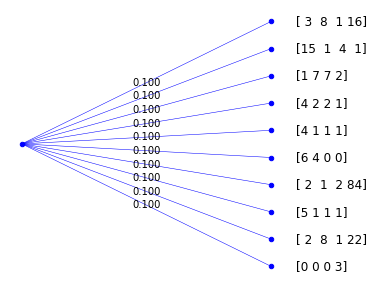

In [6]:
scenario_tree.plot('d')

### Compute opportunity cost matrix

In [7]:
opportunity_cost_matrix = network_problem.compute_opportunity_cost(scenario_tree, return_matrix=True, 
                                                                   relaxation_step1=True, relaxation_step2=True,
                                                                   verbose=0, logfile=None, decomposition=False)

Solve Wait-and-See Problems... Finished 0.312 sec
Evaluate Wait-and-See Solution #0... Finished 0.117 sec
Evaluate Wait-and-See Solution #1... Finished 0.086 sec
Evaluate Wait-and-See Solution #2... Finished 0.097 sec
Evaluate Wait-and-See Solution #3... Finished 0.245 sec
Evaluate Wait-and-See Solution #4... Finished 0.093 sec
Evaluate Wait-and-See Solution #5... Finished 0.080 sec
Evaluate Wait-and-See Solution #6... Finished 0.110 sec
Evaluate Wait-and-See Solution #7... Finished 0.142 sec
Evaluate Wait-and-See Solution #8... Finished 0.107 sec
Evaluate Wait-and-See Solution #9... Finished 0.083 sec


In [25]:
opportunity_cost_matrix

array([[4.66344828e+01, 3.00466345e+04, 7.01663448e+03, 8.60466345e+04, 1.00016345e+04, 6.01663448e+03,
        8.01663448e+03, 1.50316345e+04, 2.00166345e+04, 2.50466345e+04],
       [6.33364916e+01, 5.24336492e+02, 3.08533649e+03, 6.34403365e+04, 4.09233649e+03, 2.08533649e+03,
        3.09733649e+03, 5.17333649e+03, 1.60853365e+04, 1.41033649e+03],
       [2.01997467e+03, 2.80719747e+04, 1.10974675e+02, 8.40719747e+04, 4.08197467e+03, 9.79746748e+01,
        2.09797467e+03, 1.30589747e+04, 1.31109747e+04, 2.20849747e+04],
       [8.96313109e+01, 5.56631311e+02, 1.50631311e+02, 2.44156313e+04, 1.70631311e+02, 1.37631311e+02,
        1.63631311e+02, 2.81631311e+02, 3.28631311e+02, 4.55631311e+02],
       [3.00530852e+03, 2.70793085e+04, 2.08230852e+03, 8.60433085e+04, 1.31308519e+02, 2.06930852e+03,
        3.08130852e+03, 1.20663085e+04, 1.40953085e+04, 2.10923085e+04],
       [2.01929533e+03, 2.80712953e+04, 1.09729533e+03, 8.40712953e+04, 5.06829533e+03, 9.72953270e+01,
        2.0

### Cost-Space-Scenario-Clustering (CSSC)

In [22]:
cssc = CostSpaceScenarioPartitioning(opportunity_cost_matrix)

In [23]:
cssc.solve_mip(cardinality=2)

In [24]:
cssc.solution_mip

{'partition': ((3,), (0, 1, 2, 4, 5, 6, 7, 8, 9)),
 'representatives': (3, 9),
 'weights': array([0.1, 0.9]),
 'score': 3078.5,
 'time': 0.031000000017229468,
 'bound': 3078.5,
 'status': 101}

In [10]:
clustered_scenarios = scenario_tree.to_numpy()[cssc.solution_mip['representatives'], :]
clustered_scenarios

array([[ 2,  1,  2, 84],
       [ 3,  8,  1, 16]], dtype=int64)

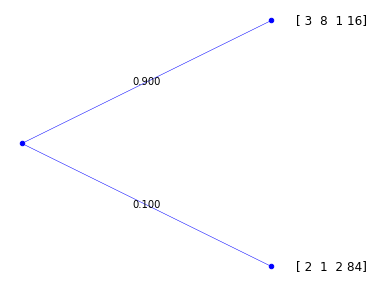

In [11]:
clustered_scenario_tree = st.twostage_from_scenarios(scenarios=clustered_scenarios, 
                                                     n_rvar={'d': 4},
                                                     weights=cssc.solution_mip['weights'])
clustered_scenario_tree.plot('d')

### Solve the problem on the clustered scenario tree

In [12]:
network_solution = network_problem.solve(clustered_scenario_tree)
network_solution

Number of scenario trees: 1 (bushiness: [2.0]) 

Initialize model... Finished. (0.012 sec).
Initialize variables... Finished. (0.001 sec).
Add deterministic constraints at subroot #1... Finished. (0.003 sec).
Define objective function at subtree #1... Finished. (0.003 sec).

Solve scenario tree #1... 
  Precompute variables and parameters... Finished. (0.000 sec).
  Check parameters validity... Finished. (0.000 sec).
  Add random constraints at subtree #1... Finished. (0.006 sec).
  Solve problem at subtree #1... Finished. (0.049 sec).
  Fill scenario tree... Finished. (0.001 sec).
Finished. (0.058 sec).


obj=2,858.600, gap=0.497%, time=0.0 sec

### Plot solution

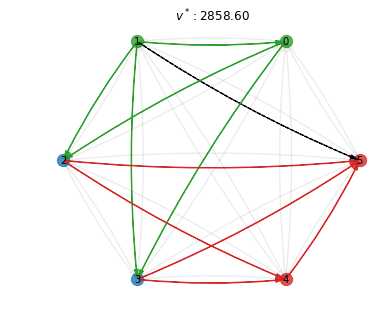

In [15]:
network_solution.plot_network()

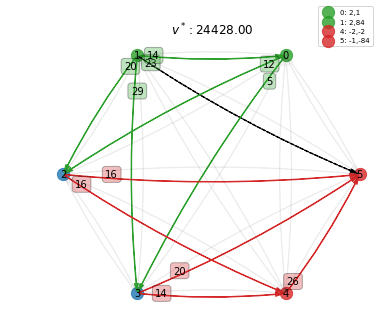

In [14]:
network_solution.plot_network(scen_index=0)